In [176]:
import numpy as np
import pandas as pd

In [177]:
##Importação dos dados de treino

In [178]:
fd001_train = pd.read_csv("train_FD001.txt",
                    sep='\s+',
                    header= None)  

fd001_test = pd.read_csv("test_FD001.txt",
                    sep='\s+',
                    header= None) 

rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None) 

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\davim\AppData\Local\Temp\ipykernel_22520\2366027756.py:2: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_22520\2366027756.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_22520\2366027756.py:9: SyntaxWarning: invalid escape sequence '\s'
  rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None)


In [179]:
##Remoção de colunas inteiramente preenchidas por NaN

In [180]:
fd001_train = fd001_train.dropna(axis=1,how='all')
fd001_test = fd001_test.dropna(axis=1,how='all')

In [181]:
##Introdução do cabeçalho do data frame

In [182]:
cabecalho1 = ["ID","Nº Ciclos","Altitude [ft]", "Mach","TRA", "T2 [°R]", "T24 [°R]", "T30 [°R]", 
             "T50[°R]", "P2 [psia]", "P15 [psia]", "P30 [psia]", "Nf [rpm]", "Nc [rpm]", "epr [-]",
             "Ps30 [psia]", "phi [pps/psi]", "NRf [rpm]", "NRc [rpm]", "BPR [-]", "farB [-]",
             "htBleed [-]", "Nf_dmd [rpm]", "PCNfR_dmd [rpm]", "W31 [lbm/s]", "W32 [lbm/s]"] 
fd001_train.columns = cabecalho1 
fd001_test.columns = cabecalho1  
cabecalho2 = ["rul"]
rul001.columns = cabecalho2

print(fd001_train.head())

   ID  Nº Ciclos  Altitude [ft]    Mach    TRA  T2 [°R]  T24 [°R]  T30 [°R]  \
0   1          1        -0.0007 -0.0004  100.0   518.67    641.82   1589.70   
1   1          2         0.0019 -0.0003  100.0   518.67    642.15   1591.82   
2   1          3        -0.0043  0.0003  100.0   518.67    642.35   1587.99   
3   1          4         0.0007  0.0000  100.0   518.67    642.35   1582.79   
4   1          5        -0.0019 -0.0002  100.0   518.67    642.37   1582.85   

   T50[°R]  P2 [psia]  ...  phi [pps/psi]  NRf [rpm]  NRc [rpm]  BPR [-]  \
0  1400.60      14.62  ...         521.66    2388.02    8138.62   8.4195   
1  1403.14      14.62  ...         522.28    2388.07    8131.49   8.4318   
2  1404.20      14.62  ...         522.42    2388.03    8133.23   8.4178   
3  1401.87      14.62  ...         522.86    2388.08    8133.83   8.3682   
4  1406.22      14.62  ...         522.19    2388.04    8133.80   8.4294   

   farB [-]  htBleed [-]  Nf_dmd [rpm]  PCNfR_dmd [rpm]  W31 [lbm/s]

In [183]:
##Geração de Histogramas e seleção de variáveis

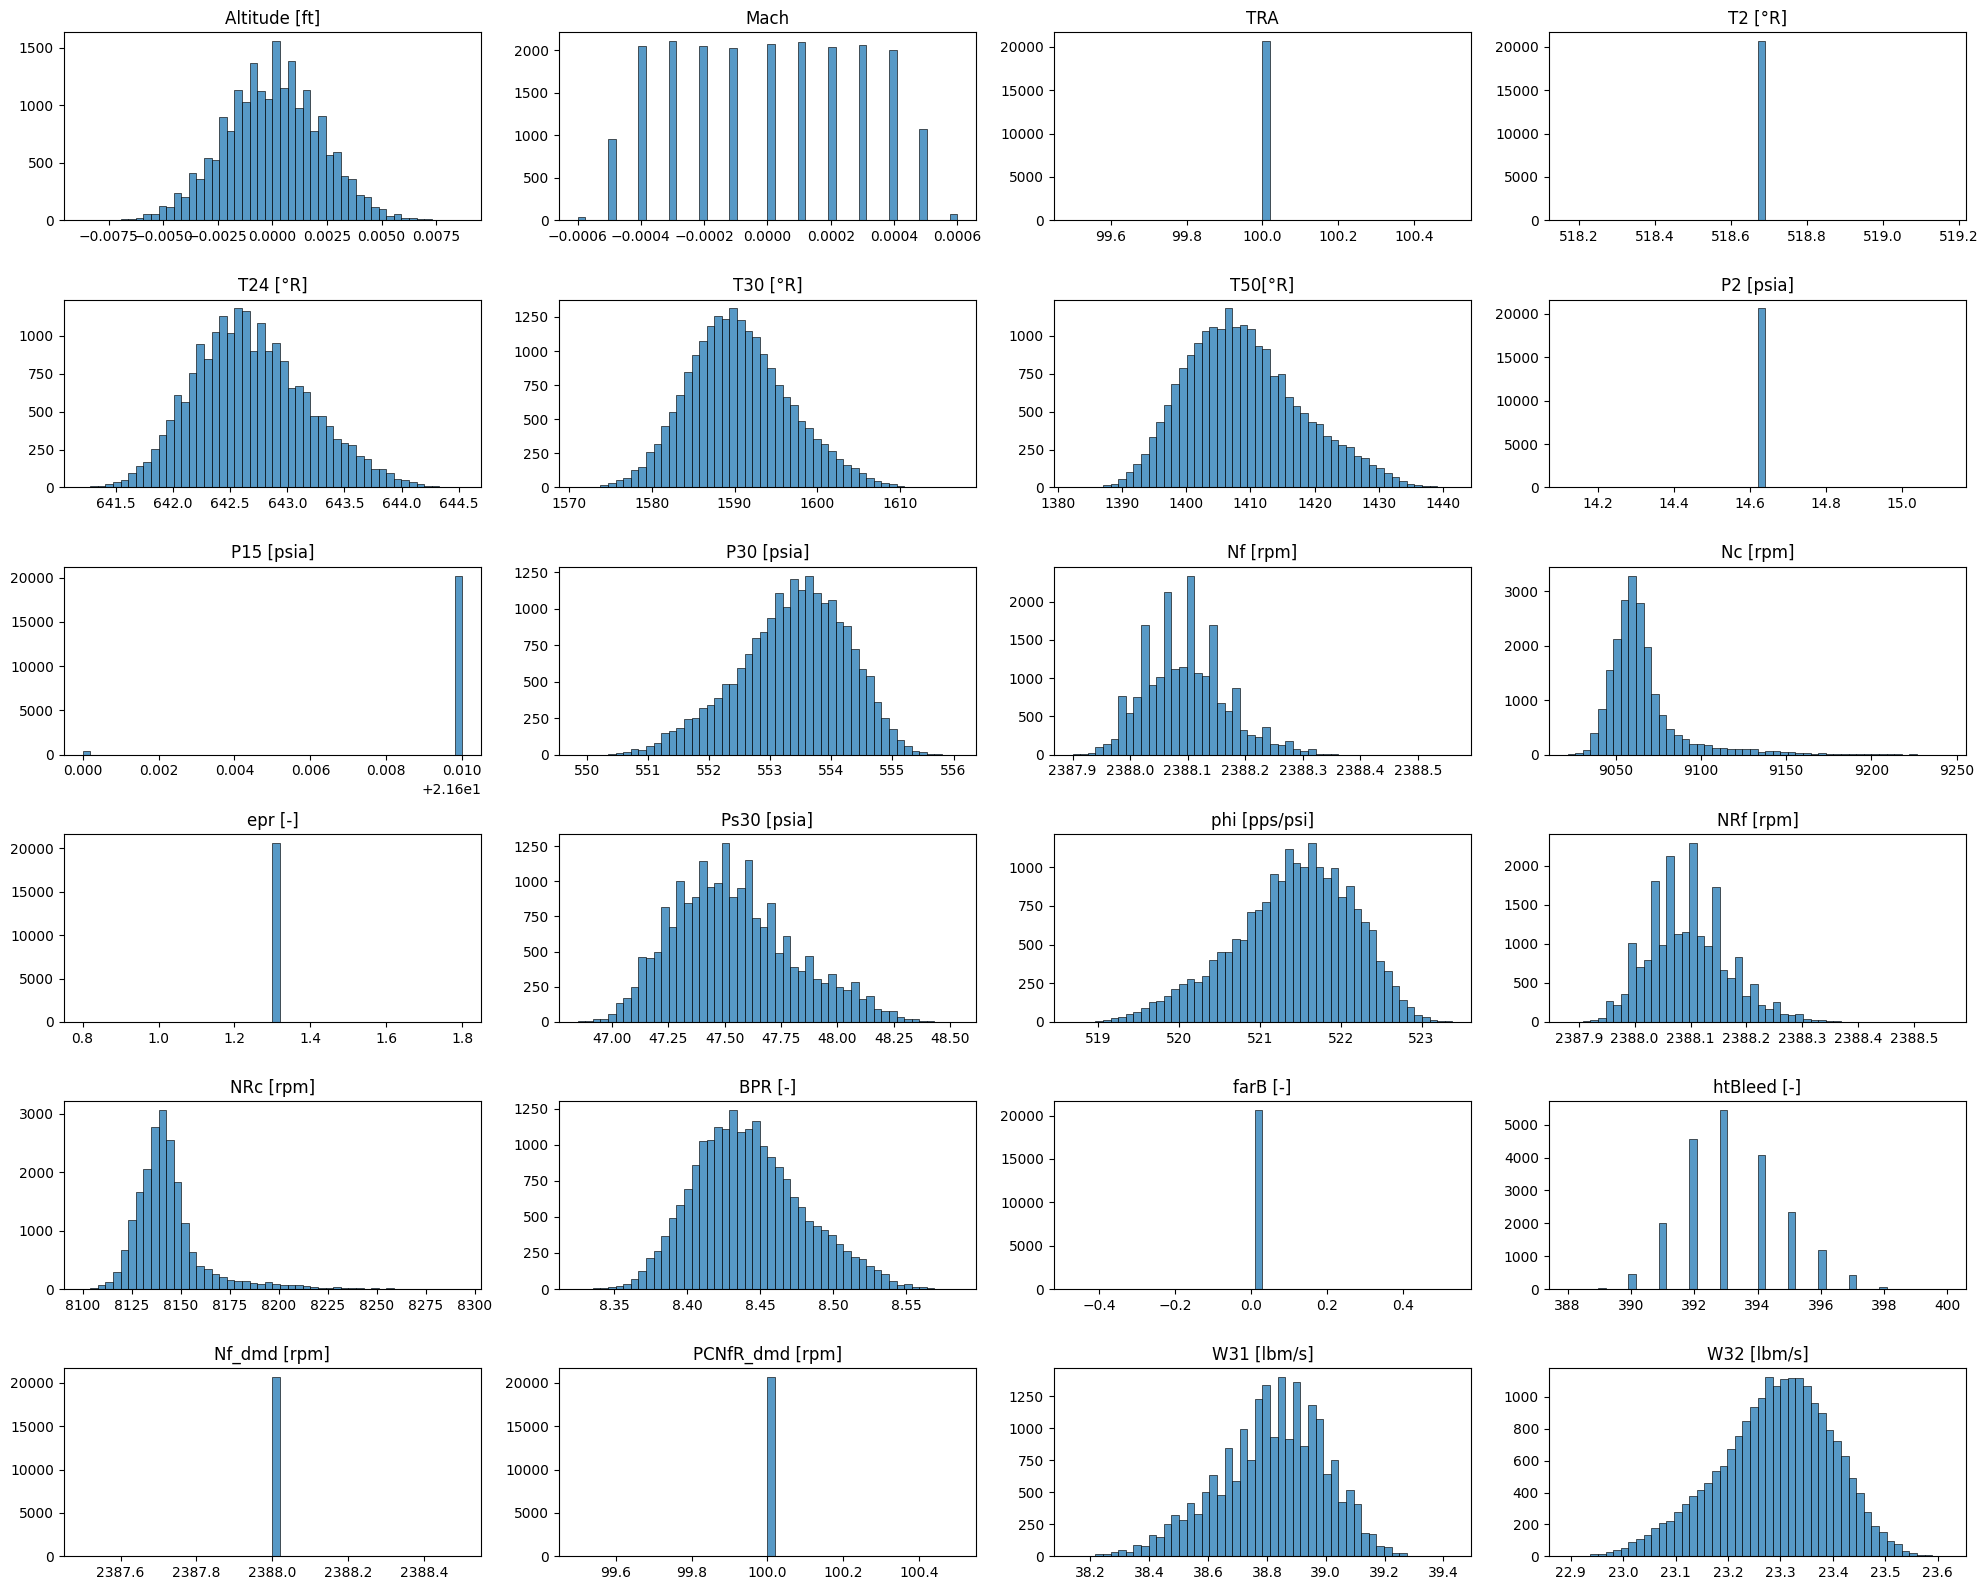

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes=plt.subplots(nrows=6,ncols=4,figsize=(20,16))
axes=axes.ravel()
for i,item in enumerate(fd001_train.columns[2:]):
    sns.histplot(fd001_train[item],bins=50,ax=axes[i])
    axes[i].set_title(f'{item}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('') 

plt.tight_layout()
plt.show()

In [185]:
features_train =fd001_train.drop(columns=['TRA','T2 [°R]','P2 [psia]', 'P15 [psia]','epr [-]',
                                    'farB [-]', 'PCNfR_dmd [rpm]'])

features_test =fd001_test.drop(columns=['TRA','T2 [°R]','P2 [psia]', 'P15 [psia]','epr [-]',
                                    'farB [-]','PCNfR_dmd [rpm]']) 

In [186]:
##Normalização

In [187]:
from sklearn.preprocessing import MinMaxScaler

In [188]:
features=features_train.columns[2:]
scaler = MinMaxScaler()
features_train[features] = scaler.fit_transform(features_train[features])
features_test[features]=scaler.transform(features_test[features]) 

In [189]:
##Definição dos targets para regressão e classificação nos dados de treino

In [190]:
limit = 130 
max_ciclos = fd001_train.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_train = []
for m in fd001_train['ID'].unique():
    motor = fd001_train[fd001_train['ID']==m]
    aux=[]
    for k in range(len(motor['Nº Ciclos'])):
        if k+1 <= max_ciclos['Nº Ciclos'].iloc[m-1]-limit:
            aux.append(limit)
        else:
            aux.append(max_ciclos['Nº Ciclos'].iloc[m-1]-
                       motor['Nº Ciclos'].iloc[k]) 
    rul_train.extend(aux) 
rul_train = [int(x) for x in rul_train]

In [191]:
##Visualização de um ciclo de vida de um motor

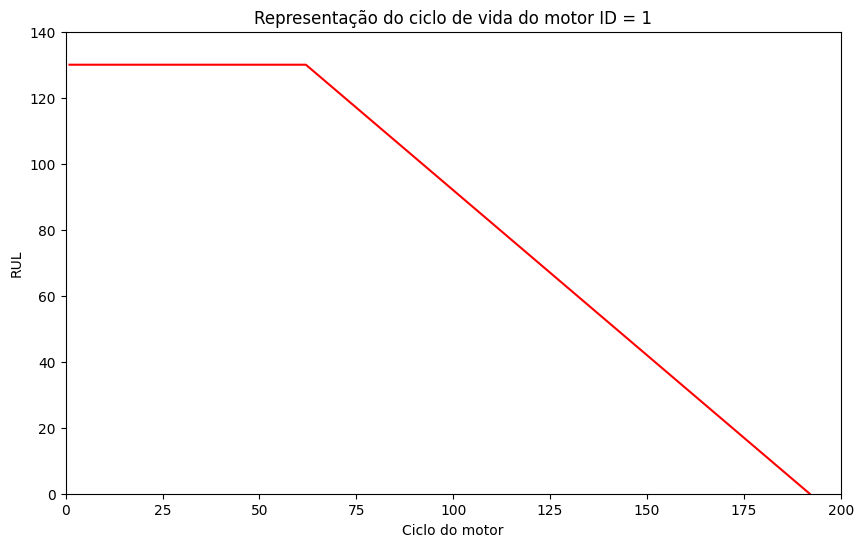

In [192]:
exemplo = fd001_train[fd001_train['ID']==1]
l=len(exemplo['Nº Ciclos'])

plt.figure(figsize=(10,6))

plt.plot(exemplo['Nº Ciclos'].iloc[0:l],rul_train[0:l],c='red')
plt.title('Representação do ciclo de vida do motor ID = 1')
plt.ylim(0,140)
plt.xlim(0,200)
plt.xlabel('Ciclo do motor')
plt.ylabel('RUL')
plt.show()

In [193]:
##Definição dos targets para regressão e classificação nos dados de teste 

In [194]:
max_ciclos_test = fd001_test.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_test = []
for m in fd001_test['ID'].unique():
    engine = fd001_test[fd001_test['ID']==m]
    for k in range(len(engine['Nº Ciclos'])):
        rul_aux=(max_ciclos_test['Nº Ciclos'].iloc[m-1]-
                 engine['Nº Ciclos'].iloc[k])
        v = rul_aux+rul001['rul'].iloc[m-1]
        if v >= limit:
            rul_test.append(limit)
        else:
            rul_test.append(v)
rul_test = [int(x) for x in rul_test]

In [195]:
##Criação das janelas de tempo para dados de treino e de teste

In [196]:
def time_window(data,rul,window_size,step):
    x,y = [], []
    l=0
    for m in data['ID'].unique():
        engine = data[data['ID']==m]
        for i in range(0,len(engine)-window_size+1,step):
            f= i + window_size
            x.append(engine.iloc[i:f,2:].values)
            y.append(rul[l+f-1]) 
        l += len(engine)
    return np.array(x), np.array(y)
window_size = 30
step = 1
x_train, y_train= time_window(features_train,rul_train,window_size,step)

print(x_train.shape,y_train.shape)  

x_test, y_test= time_window(features_test,rul_test,window_size,step)
print(x_test.shape,y_test.shape)

(17731, 30, 17) (17731,)
(10196, 30, 17) (10196,)


In [197]:
##Separação das variáveis de treino e teste

In [198]:
from sklearn.model_selection import train_test_split

x1,x2,y1,y2 = train_test_split(x_train,y_train,test_size=0.2,random_state=1)

x1=x1.astype('float32')
x2=x2.astype('float32')
y1=y1.astype('float32')
y2=y2.astype('float32')

In [199]:
##Criação do modelo LSTM

In [200]:
from tensorflow import keras 
from keras import layers
from keras.models import Sequential
from keras.metrics import AUC
from keras.layers import LSTM,Dense,Dropout,Bidirectional
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf 
import keras_tuner
import time  

shape = (x1.shape[1], x1.shape[2])

model_lstm=Sequential()
model_lstm.add(LSTM(64,activation='tanh',
                return_sequences=True,input_shape=shape))
model_lstm.add(Dropout(0.4))
model_lstm.add(LSTM(256,activation='tanh'))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(64,activation='relu'))
model_lstm.add(Dense(64,activation='relu'))
model_lstm.add(Dense(32,activation='relu'))
model_lstm.add(Dense(1,activation='linear'))

model_lstm.compile(optimizer=RMSprop(learning_rate=0.001), 
                loss='mse', 
            metrics=['mean_squared_error','mean_absolute_error'])

c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [201]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - loss: 4046.1714 - mean_absolute_error: 52.9007 - mean_squared_error: 4046.1714

71/71 ━━━━━━━━━━━━━━━━━━━━ 23s 250ms/step - loss: 2601.2170 - mean_absolute_error: 43.2104 - mean_squared_error: 2601.2170 - val_loss: 1883.5243 - val_mean_absolute_error: 38.6987 - val_mean_squared_error: 1883.5243
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - loss: 1546.1136 - mean_absolute_error: 33.4976 - mean_squared_error: 1546.1136

71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 275ms/step - loss: 1229.3542 - mean_absolute_error: 29.0031 - mean_squared_error: 1229.3542 - val_loss: 573.0236 - val_mean_absolute_error: 19.6922 - val_mean_squared_error: 573.0236
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - loss: 792.4330 - mean_absolute_error: 22.4267 - mean_squared_error: 792.4330

71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 230ms/step - loss: 755.0185 - mean_absolute_error: 21.7610 - mean_squared_error: 755.0185 - val_loss: 489.4785 - val_mean_absolute_error: 17.6545 - val_mean_squared_error: 489.4785
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - loss: 643.8480 - mean_absolute_error: 19.7978 - mean_squared_error: 643.8480

71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 264ms/step - loss: 619.5505 - mean_absolute_error: 19.3796 - mean_squared_error: 619.5505 - val_loss: 392.5443 - val_mean_absolute_error: 15.8920 - val_mean_squared_error: 392.5443
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - loss: 513.3757 - mean_absolute_error: 17.6555 - mean_squared_error: 513.3757

71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 267ms/step - loss: 501.2976 - mean_absolute_error: 17.4080 - mean_squared_error: 501.2976 - val_loss: 599.2305 - val_mean_absolute_error: 19.3230 - val_mean_squared_error: 599.2305
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - loss: 504.9586 - mean_absolute_error: 17.3978 - mean_squared_error: 504.9586

71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 251ms/step - loss: 497.8391 - mean_absolute_error: 17.3384 - mean_squared_error: 497.8391 - val_loss: 363.8173 - val_mean_absolute_error: 15.1418 - val_mean_squared_error: 363.8173
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - loss: 412.5229 - mean_absolute_error: 15.7456 - mean_squared_error: 412.5229

71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 229ms/step - loss: 411.1686 - mean_absolute_error: 15.7014 - mean_squared_error: 411.1686 - val_loss: 354.6873 - val_mean_absolute_error: 15.4523 - val_mean_squared_error: 354.6873
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step - loss: 395.9411 - mean_absolute_error: 15.4652 - mean_squared_error: 395.9411

71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 243ms/step - loss: 387.2613 - mean_absolute_error: 15.1863 - mean_squared_error: 387.2613 - val_loss: 310.9540 - val_mean_absolute_error: 12.9546 - val_mean_squared_error: 310.9540
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 371.5217 - mean_absolute_error: 14.7100 - mean_squared_error: 371.5217

71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 163ms/step - loss: 368.7695 - mean_absolute_error: 14.7007 - mean_squared_error: 368.7695 - val_loss: 314.6411 - val_mean_absolute_error: 13.0002 - val_mean_squared_error: 314.6411
Epoch 10/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 367.9022 - mean_absolute_error: 14.6486 - mean_squared_error: 367.9022

71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 171ms/step - loss: 357.1723 - mean_absolute_error: 14.4125 - mean_squared_error: 357.1723 - val_loss: 359.3716 - val_mean_absolute_error: 14.9385 - val_mean_squared_error: 359.3716
Epoch 11/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - loss: 350.2711 - mean_absolute_error: 14.2657 - mean_squared_error: 350.2711

71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 222ms/step - loss: 344.1843 - mean_absolute_error: 14.1211 - mean_squared_error: 344.1843 - val_loss: 236.5322 - val_mean_absolute_error: 11.7969 - val_mean_squared_error: 236.5322
Epoch 12/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step - loss: 355.7414 - mean_absolute_error: 14.2642 - mean_squared_error: 355.7414

71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 223ms/step - loss: 390.9464 - mean_absolute_error: 15.0566 - mean_squared_error: 390.9464 - val_loss: 313.4350 - val_mean_absolute_error: 14.3191 - val_mean_squared_error: 313.4350
Epoch 13/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - loss: 423.3304 - mean_absolute_error: 15.8089 - mean_squared_error: 423.3304

71/71 ━━━━━━━━━━━━━━━━━━━━ 21s 293ms/step - loss: 411.0901 - mean_absolute_error: 15.5789 - mean_squared_error: 411.0901 - val_loss: 294.9076 - val_mean_absolute_error: 13.5413 - val_mean_squared_error: 294.9077
Epoch 14/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - loss: 367.3781 - mean_absolute_error: 14.6587 - mean_squared_error: 367.3781

71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 276ms/step - loss: 371.4627 - mean_absolute_error: 14.7566 - mean_squared_error: 371.4627 - val_loss: 324.2432 - val_mean_absolute_error: 14.4232 - val_mean_squared_error: 324.2432
Epoch 15/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - loss: 365.1544 - mean_absolute_error: 14.6327 - mean_squared_error: 365.1544

71/71 ━━━━━━━━━━━━━━━━━━━━ 21s 300ms/step - loss: 357.7288 - mean_absolute_error: 14.4449 - mean_squared_error: 357.7288 - val_loss: 365.3911 - val_mean_absolute_error: 13.6037 - val_mean_squared_error: 365.3911
Epoch 16/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - loss: 352.1736 - mean_absolute_error: 14.3780 - mean_squared_error: 352.1736

71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 245ms/step - loss: 342.4372 - mean_absolute_error: 14.1738 - mean_squared_error: 342.4372 - val_loss: 225.7816 - val_mean_absolute_error: 11.5922 - val_mean_squared_error: 225.7816
Epoch 17/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - loss: 361.4197 - mean_absolute_error: 14.4512 - mean_squared_error: 361.4197

71/71 ━━━━━━━━━━━━━━━━━━━━ 15s 205ms/step - loss: 345.4725 - mean_absolute_error: 14.1961 - mean_squared_error: 345.4725 - val_loss: 307.5518 - val_mean_absolute_error: 12.8195 - val_mean_squared_error: 307.5518
Epoch 18/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - loss: 354.7268 - mean_absolute_error: 14.3706 - mean_squared_error: 354.7268

71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 260ms/step - loss: 332.2629 - mean_absolute_error: 13.9558 - mean_squared_error: 332.2630 - val_loss: 216.3569 - val_mean_absolute_error: 11.1213 - val_mean_squared_error: 216.3569
Epoch 19/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - loss: 315.3216 - mean_absolute_error: 13.6186 - mean_squared_error: 315.3216

71/71 ━━━━━━━━━━━━━━━━━━━━ 20s 282ms/step - loss: 323.4221 - mean_absolute_error: 13.6965 - mean_squared_error: 323.4221 - val_loss: 218.3518 - val_mean_absolute_error: 10.9272 - val_mean_squared_error: 218.3518
Epoch 20/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step - loss: 318.8427 - mean_absolute_error: 13.6685 - mean_squared_error: 318.8427

71/71 ━━━━━━━━━━━━━━━━━━━━ 22s 304ms/step - loss: 311.6796 - mean_absolute_error: 13.5074 - mean_squared_error: 311.6796 - val_loss: 250.8605 - val_mean_absolute_error: 12.2442 - val_mean_squared_error: 250.8605
Epoch 21/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - loss: 305.7150 - mean_absolute_error: 13.3228 - mean_squared_error: 305.7150

71/71 ━━━━━━━━━━━━━━━━━━━━ 22s 314ms/step - loss: 304.3383 - mean_absolute_error: 13.2078 - mean_squared_error: 304.3383 - val_loss: 223.4952 - val_mean_absolute_error: 10.8052 - val_mean_squared_error: 223.4952
Epoch 22/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - loss: 295.9512 - mean_absolute_error: 13.1992 - mean_squared_error: 295.9512

71/71 ━━━━━━━━━━━━━━━━━━━━ 22s 314ms/step - loss: 295.8116 - mean_absolute_error: 13.1348 - mean_squared_error: 295.8116 - val_loss: 270.6616 - val_mean_absolute_error: 11.6181 - val_mean_squared_error: 270.6616
Epoch 23/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - loss: 305.1514 - mean_absolute_error: 13.2463 - mean_squared_error: 305.1514

71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 247ms/step - loss: 296.8925 - mean_absolute_error: 13.0230 - mean_squared_error: 296.8925 - val_loss: 220.8647 - val_mean_absolute_error: 10.6682 - val_mean_squared_error: 220.8647


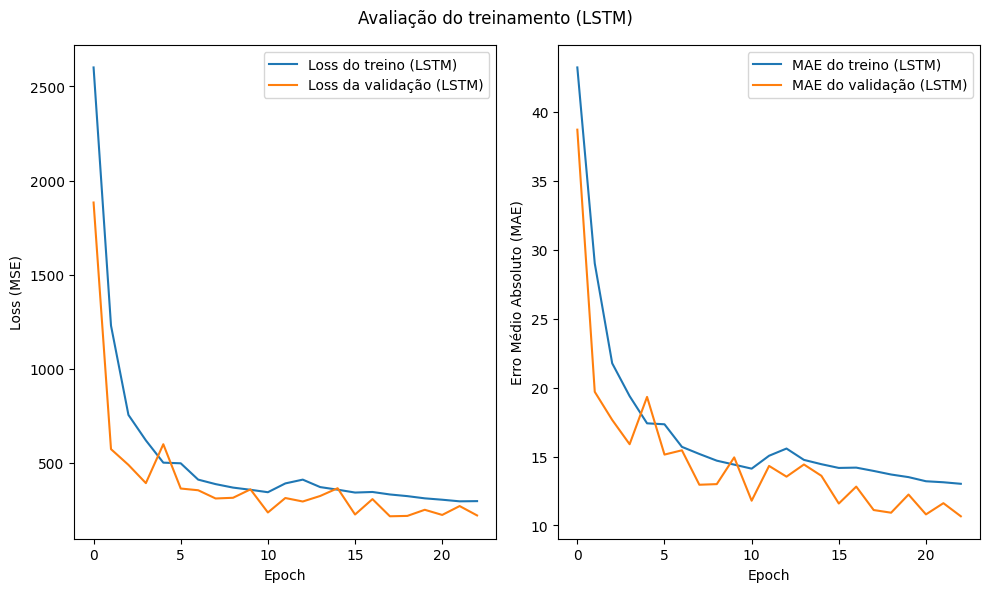

In [202]:
start=time.time()
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('lstm_model.h5', monitor='val_loss')
history_lstm=model_lstm.fit(x1,y1,validation_data=(x2,y2),epochs=30,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint]) 

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Loss do treino (LSTM)')
plt.plot(history_lstm.history['val_loss'], label='Loss da validação (LSTM)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['mean_absolute_error'], label='MAE do treino (LSTM)')
plt.plot(history_lstm.history['val_mean_absolute_error'], label='MAE do validação (LSTM)')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (LSTM)')
plt.tight_layout()
plt.show()

In [203]:
##Testando o modelo com os dados de teste 

In [204]:
rul_prev = model_lstm.predict(x_test).reshape(-1)
rul_prev = [float(x) for x in rul_prev]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 14s 43ms/step


In [205]:
##Avaliando o modelo

231.00758019269475
15.20
0.13085311995849233
10.948137339539226
0.7667381039477842
Tempo de 434.318212s


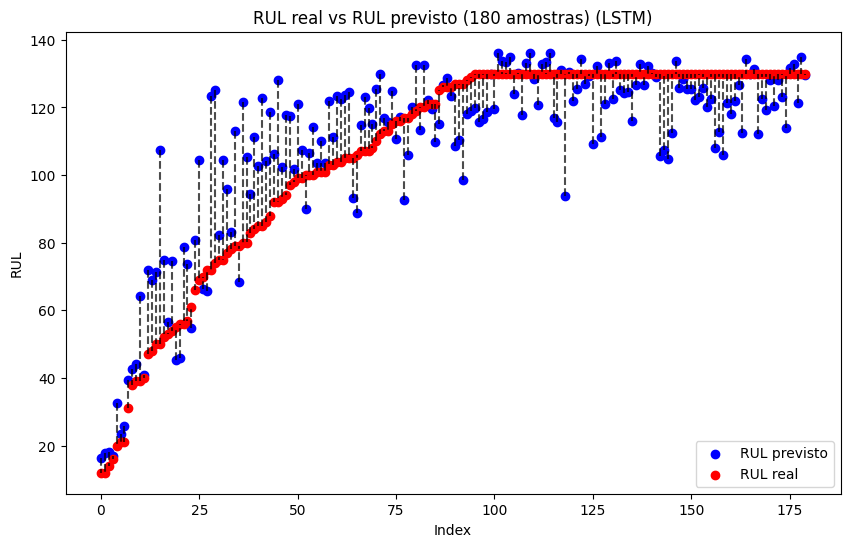

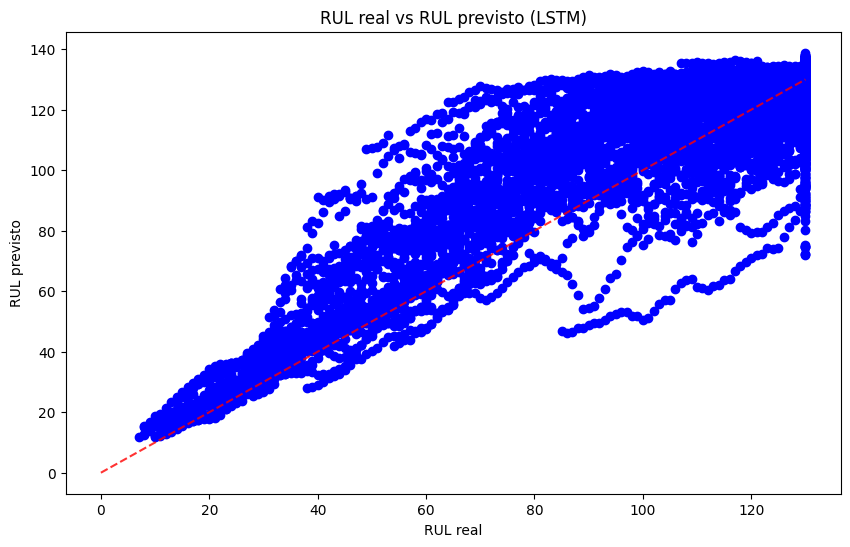

In [206]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test,rul_prev))
print(f'{np.sqrt(mean_squared_error(y_test,rul_prev)):.2f}')
print(mean_absolute_percentage_error(y_test,rul_prev))
print(mean_absolute_error(y_test,rul_prev))
print(r2_score(y_test,rul_prev))  
print(f'Tempo de {end-start:2f}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev),size=n_amostras,replace=False)
y_real_amostra=np.array(y_test)[indices]
y_prev_amostra=np.array(rul_prev)[indices]
ordem = np.argsort(y_real_amostra)
y_real_amostra=y_real_amostra[ordem]
y_prev_amostra=y_prev_amostra[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (LSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra[i],y_real_amostra[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test,rul_prev,c='blue')
plt.plot([0,limit],[0,limit],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (LSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()

In [207]:
##Criando modelo BiLSTM

In [208]:
model_bi=Sequential()
model_bi.add(Bidirectional(LSTM(64,activation='tanh',input_shape=shape)))
model_bi.add(Dropout(0.5))
model_bi.add(Dense(64,activation='relu'))
model_bi.add(Dense(1,activation='linear'))

model_bi.compile(optimizer=RMSprop(learning_rate=0.001), 
                loss='mse', 
            metrics=['mean_squared_error','mean_absolute_error'])

c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [209]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 5291.3379 - mean_absolute_error: 61.3275 - mean_squared_error: 5291.3379

71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 104ms/step - loss: 3493.3655 - mean_absolute_error: 49.6610 - mean_squared_error: 3493.3655 - val_loss: 1865.7612 - val_mean_absolute_error: 38.4181 - val_mean_squared_error: 1865.7612
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 1446.3741 - mean_absolute_error: 32.7090 - mean_squared_error: 1446.3741

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 93ms/step - loss: 1073.6940 - mean_absolute_error: 27.4230 - mean_squared_error: 1073.6940 - val_loss: 562.6518 - val_mean_absolute_error: 19.4038 - val_mean_squared_error: 562.6518
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 667.4041 - mean_absolute_error: 20.7238 - mean_squared_error: 667.4041

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - loss: 673.1085 - mean_absolute_error: 20.7458 - mean_squared_error: 673.1085 - val_loss: 524.2753 - val_mean_absolute_error: 19.5009 - val_mean_squared_error: 524.2753
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 591.0723 - mean_absolute_error: 19.3432 - mean_squared_error: 591.0723

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 595.2790 - mean_absolute_error: 19.3276 - mean_squared_error: 595.2790 - val_loss: 574.3334 - val_mean_absolute_error: 19.2023 - val_mean_squared_error: 574.3334
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 600.7252 - mean_absolute_error: 19.3611 - mean_squared_error: 600.7253

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - loss: 577.3602 - mean_absolute_error: 18.9198 - mean_squared_error: 577.3602 - val_loss: 431.5378 - val_mean_absolute_error: 16.3975 - val_mean_squared_error: 431.5378
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 587.6348 - mean_absolute_error: 18.9782 - mean_squared_error: 587.6348

71/71 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - loss: 566.8519 - mean_absolute_error: 18.5992 - mean_squared_error: 566.8519 - val_loss: 433.2343 - val_mean_absolute_error: 15.8671 - val_mean_squared_error: 433.2343
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 554.3427 - mean_absolute_error: 18.4215 - mean_squared_error: 554.3427

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 85ms/step - loss: 551.4567 - mean_absolute_error: 18.3513 - mean_squared_error: 551.4567 - val_loss: 470.9438 - val_mean_absolute_error: 16.9402 - val_mean_squared_error: 470.9438
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 526.5438 - mean_absolute_error: 18.0196 - mean_squared_error: 526.5438

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 535.1326 - mean_absolute_error: 18.0910 - mean_squared_error: 535.1326 - val_loss: 425.2600 - val_mean_absolute_error: 16.2984 - val_mean_squared_error: 425.2600
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 518.2463 - mean_absolute_error: 17.7377 - mean_squared_error: 518.2463

71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - loss: 518.4817 - mean_absolute_error: 17.7060 - mean_squared_error: 518.4817 - val_loss: 454.0385 - val_mean_absolute_error: 16.8105 - val_mean_squared_error: 454.0385
Epoch 10/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 514.4034 - mean_absolute_error: 17.6937 - mean_squared_error: 514.4034

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - loss: 500.9373 - mean_absolute_error: 17.4467 - mean_squared_error: 500.9373 - val_loss: 603.1399 - val_mean_absolute_error: 17.7871 - val_mean_squared_error: 603.1399
Epoch 11/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 512.1568 - mean_absolute_error: 17.5915 - mean_squared_error: 512.1568

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 492.7787 - mean_absolute_error: 17.2221 - mean_squared_error: 492.7787 - val_loss: 437.7473 - val_mean_absolute_error: 15.4745 - val_mean_squared_error: 437.7473
Epoch 12/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 478.4322 - mean_absolute_error: 16.9440 - mean_squared_error: 478.4322

71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 473.5173 - mean_absolute_error: 16.8586 - mean_squared_error: 473.5173 - val_loss: 317.1260 - val_mean_absolute_error: 13.5948 - val_mean_squared_error: 317.1260
Epoch 13/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 454.6542 - mean_absolute_error: 16.4909 - mean_squared_error: 454.6542

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 451.9601 - mean_absolute_error: 16.4863 - mean_squared_error: 451.9601 - val_loss: 338.9909 - val_mean_absolute_error: 14.4223 - val_mean_squared_error: 338.9909
Epoch 14/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 428.4666 - mean_absolute_error: 15.9716 - mean_squared_error: 428.4666

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 431.2955 - mean_absolute_error: 16.0485 - mean_squared_error: 431.2955 - val_loss: 293.7307 - val_mean_absolute_error: 13.6149 - val_mean_squared_error: 293.7307
Epoch 15/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 418.4500 - mean_absolute_error: 15.7940 - mean_squared_error: 418.4500

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 413.9549 - mean_absolute_error: 15.6940 - mean_squared_error: 413.9549 - val_loss: 337.3171 - val_mean_absolute_error: 13.9442 - val_mean_squared_error: 337.3171
Epoch 16/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 395.3222 - mean_absolute_error: 15.3174 - mean_squared_error: 395.3222

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 400.3237 - mean_absolute_error: 15.4606 - mean_squared_error: 400.3237 - val_loss: 242.5839 - val_mean_absolute_error: 11.9160 - val_mean_squared_error: 242.5839
Epoch 17/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 394.0200 - mean_absolute_error: 15.2734 - mean_squared_error: 394.0200

71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 386.5563 - mean_absolute_error: 15.1475 - mean_squared_error: 386.5563 - val_loss: 323.6747 - val_mean_absolute_error: 13.4751 - val_mean_squared_error: 323.6747
Epoch 18/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 389.5972 - mean_absolute_error: 15.2129 - mean_squared_error: 389.5972

71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 381.9922 - mean_absolute_error: 15.0372 - mean_squared_error: 381.9922 - val_loss: 303.3386 - val_mean_absolute_error: 13.0429 - val_mean_squared_error: 303.3386
Epoch 19/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 364.5287 - mean_absolute_error: 14.7117 - mean_squared_error: 364.5287

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 364.9214 - mean_absolute_error: 14.6633 - mean_squared_error: 364.9214 - val_loss: 253.8770 - val_mean_absolute_error: 12.3721 - val_mean_squared_error: 253.8770
Epoch 20/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 367.4952 - mean_absolute_error: 14.5852 - mean_squared_error: 367.4952

71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 356.9101 - mean_absolute_error: 14.4378 - mean_squared_error: 356.9101 - val_loss: 348.4292 - val_mean_absolute_error: 13.7370 - val_mean_squared_error: 348.4292
Epoch 21/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 362.4553 - mean_absolute_error: 14.6214 - mean_squared_error: 362.4553

71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 358.0805 - mean_absolute_error: 14.4871 - mean_squared_error: 358.0805 - val_loss: 245.0118 - val_mean_absolute_error: 11.4433 - val_mean_squared_error: 245.0118


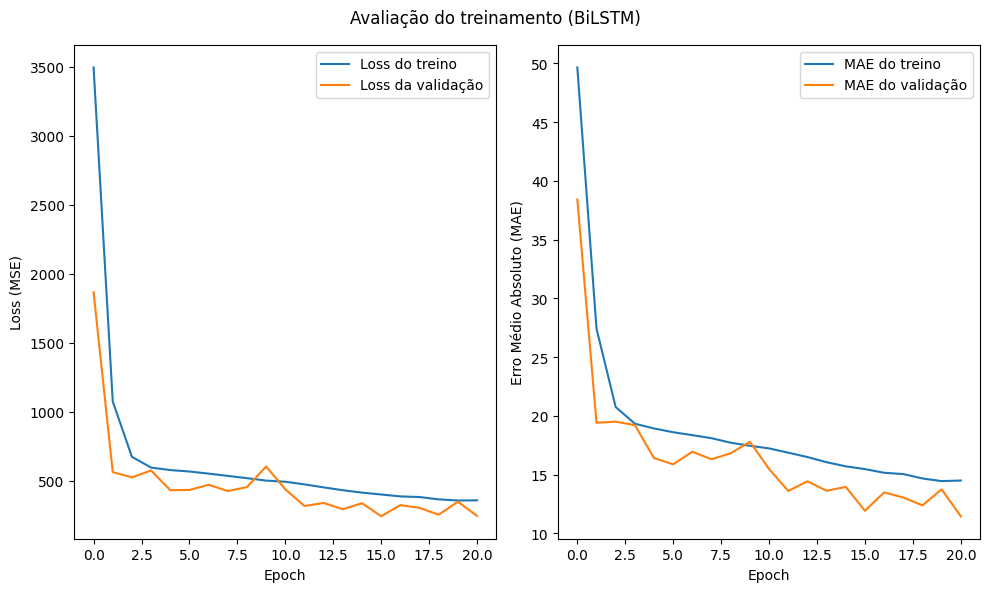

In [210]:
start=time.time()
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('bi_model.h5', monitor='val_loss')
history_bi=model_bi.fit(x1,y1,validation_data=(x2,y2),epochs=30,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint])

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_bi.history['loss'], label='Loss do treino')
plt.plot(history_bi.history['val_loss'], label='Loss da validação')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_bi.history['mean_absolute_error'], label='MAE do treino')
plt.plot(history_bi.history['val_mean_absolute_error'], label='MAE do validação')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (BiLSTM)')
plt.tight_layout()
plt.show()

In [211]:
##Testando o modelo com os dados de teste

In [212]:
rul_prev = model_bi.predict(x_test).reshape(-1)
rul_prev = [float(x) for x in rul_prev]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [213]:
##Avaliando o modelo

303.1671207658189
17.41
0.1411943408316164
13.35126195883648
0.6938743856303884
Tempo de 96.943240s


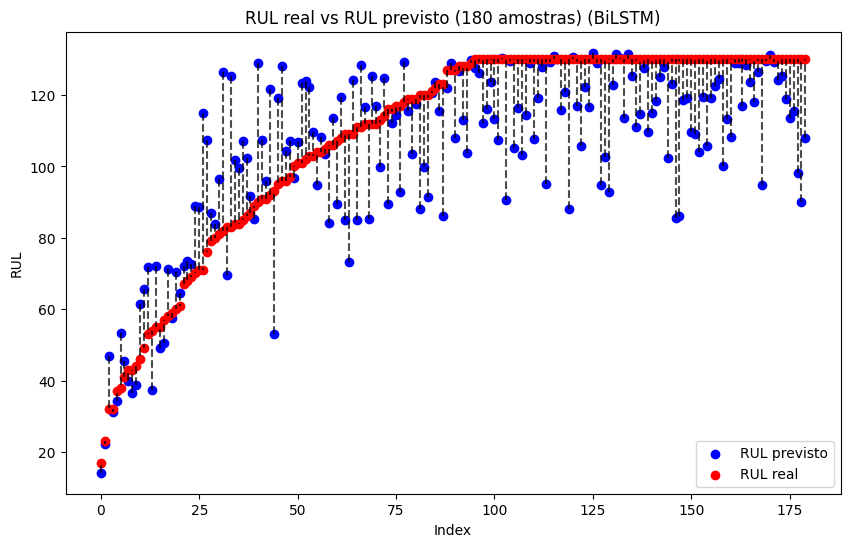

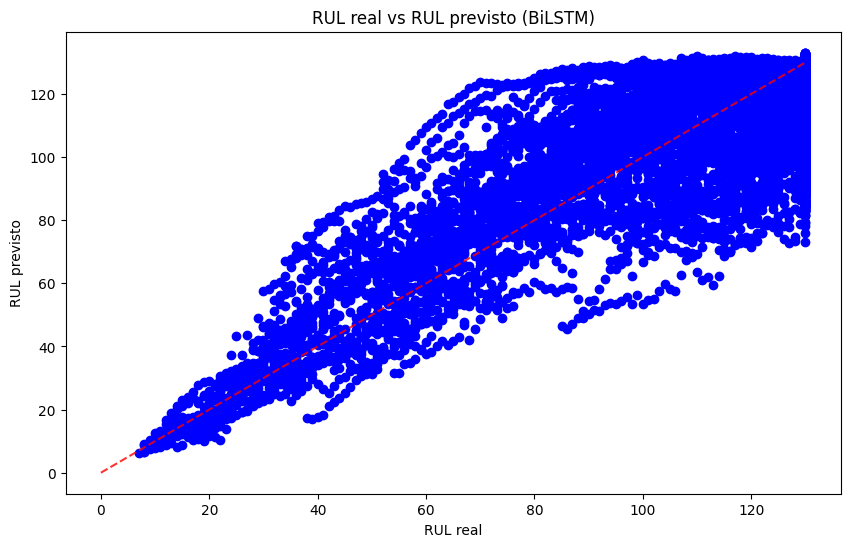

In [214]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test,rul_prev))
print(f'{np.sqrt(mean_squared_error(y_test,rul_prev)):.2f}')
print(mean_absolute_percentage_error(y_test,rul_prev))
print(mean_absolute_error(y_test,rul_prev))
print(r2_score(y_test,rul_prev))  
print(f'Tempo de {end-start:2f}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev),size=n_amostras,replace=False)
y_real_amostra=np.array(y_test)[indices]
y_prev_amostra=np.array(rul_prev)[indices]
ordem = np.argsort(y_real_amostra)
y_real_amostra=y_real_amostra[ordem]
y_prev_amostra=y_prev_amostra[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (BiLSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra[i],y_real_amostra[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test,rul_prev,c='blue')
plt.plot([0,limit],[0,limit],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (BiLSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()